<a href="https://colab.research.google.com/github/Jonathan-code-hub/Many-Mini-OR-Problems/blob/main/LP_Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 3: Bloomington Breweries produces beer and ale. Beer
sells for \$5 per barrel, and ale sells for \$2 per barrel.
Producing a barrel of beer requires 5 lb of corn and 2 lb of
hops. Producing a barrel of ale requires 2 lb of corn and 1
lb of hops. Sixty pounds of corn and 25 lb of hops are
available. Formulate an LP that can be used to maximize
revenue. Solve the LP graphically

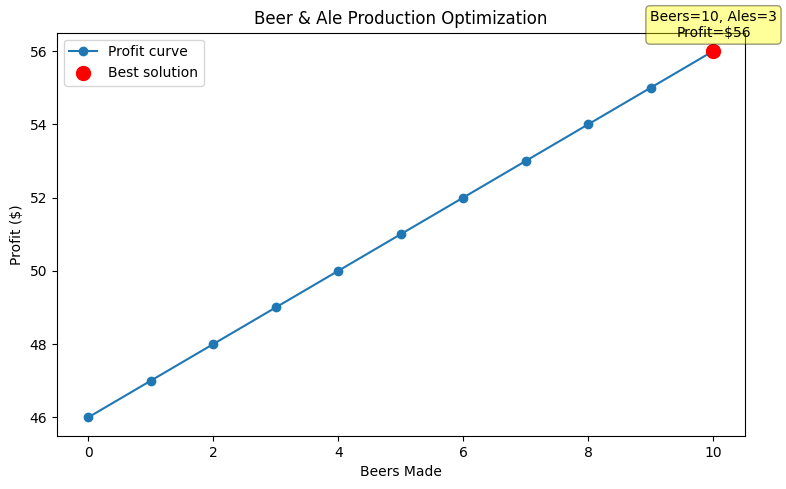

In [21]:
import matplotlib.pyplot as plt

# Variables #

maxCorn = 63
maxHops = 23
cornPerBeer = 5
hopsPerBeer = 2
cornPerAle = 2
hopsPerAle = 1
beerPrice = 5
alePrice = 2

profitsMade = []
beersMade = []
alesMade = []

maxBeer = min(maxCorn/cornPerBeer, maxHops/hopsPerBeer)

# For Loop That Determines How Many Ales Can Be Made From The Remaining Corns and Hops #

for n in range(int(maxBeer)):
    beersMade.append(n)
    cornLeft = maxCorn - (n * cornPerBeer)
    hopsLeft = maxHops - (n * hopsPerBeer)
    alesMade.append(min(cornLeft/cornPerAle, hopsLeft/hopsPerAle))
    profitsMade.append((n * beerPrice) + (alesMade[n] * alePrice))

# Find best solution #
best_idx = max(range(len(profitsMade)), key=lambda i: profitsMade[i])
best_beers = beersMade[best_idx]
best_ales = alesMade[best_idx]
best_profit = profitsMade[best_idx]

# --- Plot --- #
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(beersMade, profitsMade, marker="o", label="Profit curve")
ax.scatter(best_beers, best_profit, color="red", s=100, zorder=3, label="Best solution")

# Annotate the best solution #
ax.annotate(f"Beers={best_beers}, Ales={best_ales:.0f}\nProfit=${best_profit:.0f}",
            (best_beers, best_profit),
            textcoords="offset points", xytext=(0,10), ha="center", fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.4))

ax.set_xlabel("Beers Made")
ax.set_ylabel("Profit ($)")
ax.set_title("Beer & Ale Production Optimization")
ax.legend()
plt.tight_layout()
plt.show()